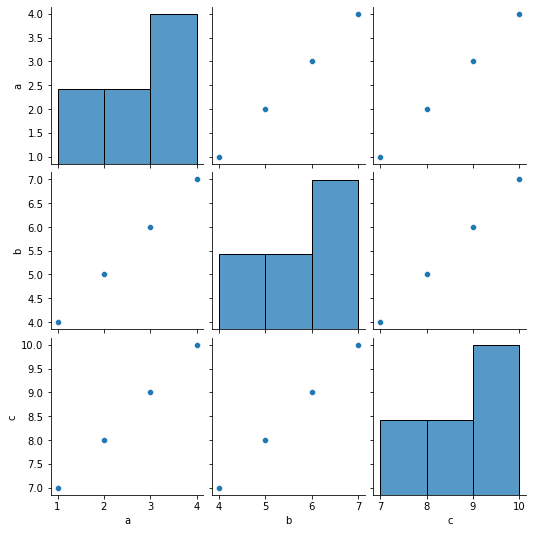

In [91]:
import seaborn as sns
import pandas as pd

# 创建一个包含三列的随机数据
df = pd.DataFrame({'a': [1, 2, 3, 4], 'b': [4, 5, 6, 7], 'c': [7, 8, 9, 10]})

# 画出每两列之间的关系分布图
sns.pairplot(df)

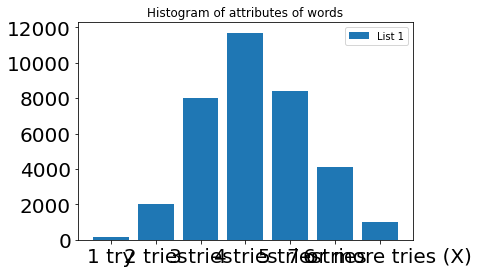

In [93]:
import pandas as pd
import pylab as plt
import numpy as np

path1 =  r"D:\MCM\processed data.xlsx"#path1是短期的文件路径
df= pd.read_excel(path1)

x1 = df['1 try'].sum()
x2 = df['2 tries'].sum()
x3 = df['3 tries'].sum()
x4 = df['4 tries'].sum()
x5 = df['5 tries'].sum()
x6 = df['6 tries'].sum()
x7 = df['7 or more tries (X)'].sum()

x = ['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']
y = [x1,x2,x3,x4,x5,x6,x7]

fig, ax = plt.subplots()
ax.bar(x, y, label='List 1')
ax.legend()
plt.title('Histogram of attributes of words')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# df=df[['Date','Word','1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']]

Shapiro-Wilk检验统计量: 0.869, p-value: 0.181
Shapiro-Wilk检验统计量: 0.902, p-value: 0.340
Shapiro-Wilk检验统计量: 0.884, p-value: 0.245
Shapiro-Wilk检验统计量: 0.860, p-value: 0.151
Shapiro-Wilk检验统计量: 0.832, p-value: 0.084
Shapiro-Wilk检验统计量: 0.893, p-value: 0.289
Shapiro-Wilk检验统计量: 0.870, p-value: 0.186
Shapiro-Wilk检验统计量: 0.922, p-value: 0.484
Shapiro-Wilk检验统计量: 0.832, p-value: 0.084
Shapiro-Wilk检验统计量: 0.852, p-value: 0.127
Shapiro-Wilk检验统计量: 0.849, p-value: 0.119
Shapiro-Wilk检验统计量: 0.885, p-value: 0.252
Shapiro-Wilk检验统计量: 0.891, p-value: 0.282
Shapiro-Wilk检验统计量: 0.883, p-value: 0.242
Shapiro-Wilk检验统计量: 0.869, p-value: 0.182
Shapiro-Wilk检验统计量: 0.883, p-value: 0.238
Shapiro-Wilk检验统计量: 0.872, p-value: 0.194
Shapiro-Wilk检验统计量: 0.879, p-value: 0.220
Shapiro-Wilk检验统计量: 0.888, p-value: 0.267
Shapiro-Wilk检验统计量: 0.893, p-value: 0.289
Shapiro-Wilk检验统计量: 0.887, p-value: 0.258
Shapiro-Wilk检验统计量: 0.890, p-value: 0.275
Shapiro-Wilk检验统计量: 0.883, p-value: 0.241
Shapiro-Wilk检验统计量: 0.898, p-value: 0.319
Shapiro-Wilk检验统计

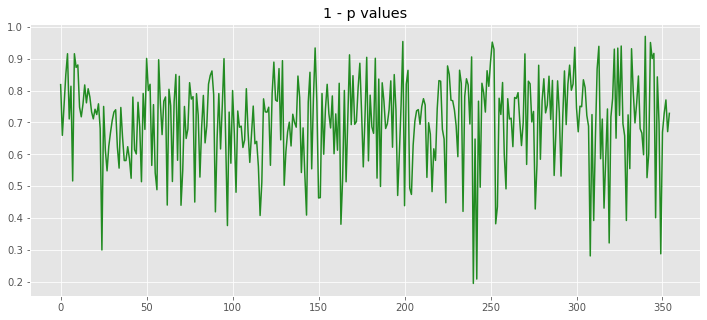

In [107]:

from scipy.stats import shapiro
import numpy as np
from scipy.stats import probplot
import pandas as pd
import matplotlib.pyplot as plt

path1 =  r"D:\MCM\processed data 2.xlsx"#path1是短期的文件路径
df= pd.read_excel(path1)

ind = df.index
x1 = df['1 try']
x2 = df['2 tries']
x3 = df['3 tries']
x4 = df['4 tries']
x5 = df['5 tries']
x6 = df['6 tries']
x7 = df['7 or more tries (X)']
data = []
for i in range(0,len(df)):
    data1 = (np.array([x1[i], x2[i], x3[i], x4[i], x5[i], x6[i], x7[i]]) ) # 7个数据
    stat, p = shapiro(data1)
    print('Shapiro-Wilk检验统计量: {:.3f}, p-value: {:.3f}'.format(stat, p))
    data.append(p)

# one_dim_array = np.ravel(data)
fig, ax = plt.subplots(figsize=(12, 5))
new_data = [-x + 1 for x in data]
plt.style.use('ggplot')
ax.plot(ind, new_data,color = 'forestgreen')
ax.set_title('1 - p values')
plt.show()


In [152]:
import pandas as pd
import pylab as plt
import numpy as np
import tensorflow as ts
from keras.models import Sequential
from keras.layers import LSTM, Dense

def to_lstm_format(data):
    lstm_data = np.zeros((data.shape[0], 1, data.shape[1]))
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            lstm_data[i][0][j] = data[i][j]
    return lstm_data


path1 =  r"D:\MCM\data sigma.xlsx"#path1是短期的文件路径
df= pd.read_excel(path1)

num_words = len(df)
num_features = 4
num_labels = 7

X_train = df.iloc[:,14:18]
print(X_train)
y_train = df.iloc[:,7:14]

model = Sequential()
model.add(LSTM(64, input_shape=(4, 1)))
model.add(Dense(num_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

predictt = []
arr = [3,5,10,20,40,80]
for i in arr:

    history = model.fit(np.expand_dims(X_train, axis=2), y_train, epochs=i, batch_size=32, validation_data=(X_train, y_train),verbose=1)

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    print(np.array([train_loss,val_loss,train_acc,val_acc]))


    input_array = np.array([0.49577464788732395, 3,3,3])
    X_new = np.reshape(input_array, (1, 4, 1))
    print(np.shape(X_new))
    predictions = model.predict(X_new)
    predictt.append(predictions)
print(predictt)


     word letter  word_class  word_fre  letter_repeat
0       0.241127           1         4              1
1       0.288451           1         3              1
2       0.318873           1         2              2
3       0.251268           3         3              1
4       0.235493           2         5              1
..           ...         ...       ...            ...
350     0.284507           1         3              2
351     0.294648           1         1              1
352     0.261408           1         3              1
353     0.341972           3         1              1
354     0.275493           4         1              1

[355 rows x 4 columns]
Epoch 1/3
12/12 [==============================] - 5s 100ms/step - loss: 185.5551 - accuracy: 0.7352 - val_loss: 181.0549 - val_accuracy: 0.7352
Epoch 2/3
12/12 [==============================] - 0s 11ms/step - loss: 177.9636 - accuracy: 0.7352 - val_loss: 173.7587 - val_accuracy: 0.7352
Epoch 3/3
12/12 [======================

In [86]:
from scipy.stats import shapiro
import numpy as np
from scipy.stats import probplot
import pandas as pd
import matplotlib.pyplot as plt

path1 =  r"D:\MCM\processed data 2.xlsx"#path1是短期的文件路径
df= pd.read_excel(path1)
u = df['$word\_difficult_{i}$']
df1 = df.iloc[:,6:13]
sigma = []
for j in range(0,len(df1)):
    b = df1.iloc[j]
    score = 0
    uu = u.loc[j]
    for i in range(0,7):
        c = b.iloc[i]
        score += c*((i-uu)**2)/100
    sigma.append(score)
print(sigma)

df['sigama'] = sigma

df.to_excel(r"D:\MCM\data sigma.xlsx")





[1.4380000000000002, 1.7765, 2.0633, 1.8891999999999998, 1.3141, 2.098, 1.835211, 1.9852000000000003, 1.3141, 1.4397, 1.5838239999999997, 2.2318239999999996, 1.2918239999999999, 1.5436000000000003, 1.4045239999999997, 1.9097250000000006, 1.3593000000000002, 1.9219999999999993, 1.4956909999999999, 1.6091999999999997, 1.4477710000000001, 2.0035999999999996, 1.506964, 1.5163999999999993, 2.086619, 1.4436, 1.7093809999999998, 2.0972210000000002, 1.7145, 1.7037890000000004, 1.8597000000000004, 2.1388000000000007, 2.163611, 1.6957000000000002, 1.7196999999999998, 1.9089000000000003, 1.6500000000000001, 1.6909, 1.6909, 1.8613000000000004, 2.4997000000000003, 2.2478209999999996, 2.2105, 1.885616, 1.7186910000000002, 1.1221240000000001, 2.4722209999999993, 1.7330239999999997, 1.9989000000000006, 1.602, 1.4028, 1.3793000000000002, 1.6717000000000004, 1.6744909999999997, 1.4925, 1.8140999999999998, 1.9911559999999997, 1.4162290000000002, 1.5094239999999999, 1.87, 1.4397, 1.3459999999999999, 3.040

In [ ]:
import pandas as pd
import pylab as plt
import numpy as np
import tensorflow as ts
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def to_lstm_format(data):
    lstm_data = np.zeros((data.shape[0], 1, data.shape[1]))
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            lstm_data[i][0][j] = data[i][j]
    return lstm_data


path1 =  r"D:\MCM\data sigma.xlsx"#path1是短期的文件路径
df= pd.read_excel(path1)

num_words = len(df)
num_features = 4
num_labels = 2

X_train = df.iloc[:,14:18]
print(X_train)
y_train = df.iloc[:,18:20]
print(y_train)

model = Sequential()
model.add(LSTM(64, input_shape=(4, 1)))
model.add(Dense(num_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(np.expand_dims(X_train, axis=2), y_train, epochs=10, batch_size=32, validation_data=(X_train, y_train),verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(np.array([train_loss,val_loss,train_acc,val_acc]))


input_array = np.array([0.25915,1,3,1])
X_new = np.reshape(input_array, (1, 4, 1))
print(np.shape(X_new))
predictions = model.predict(X_new)

print(predictions)

In [197]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import pandas as pd

path1 =  r"D:\MCM\data sigma.xlsx"#path1是短期的文件路径
df= pd.read_excel(path1)

X_train = df.iloc[:,14:18]
y_train = df.iloc[:,18:20]

# 输入的4个难度参数的数量
input_dim = 4
# 输出的猜出单词需要次数的数量
output_dim = 2
# LSTM的层数
num_layers = 7
# LSTM每层的单元数
num_units = 32
# MC Dropout的抽样次数
num_samples = 100

# 构建LSTM模型
model = Sequential()
for i in range(num_layers):
    # 第一层需要指定输入的shape
    if i == 0:
        model.add(LSTM(num_units, input_shape=(None, input_dim), return_sequences=True))
    else:
        model.add(LSTM(num_units, return_sequences=True))
    # 对于每一层都添加一个MC Dropout层
    model.add(Dropout(0.2))
# 最后一层输出7个猜测次数
model.add(Dense(output_dim, activation='linear'))

# 编译模型
model.compile(loss='mean_squared_error', optimizer='adam')

# 构建随机输入，用于MC Dropout
def create_mc_samples(x, num_samples):
    samples = np.zeros((num_samples, x.shape[0], x.shape[1]))
    for i in range(num_samples):
        samples[i] = x * np.random.binomial(1, 0.5, size=x.shape)
    return samples

# 假设已知的355个单词的难度参数存储在一个numpy array中，每行代表一个单词，每列代表一个难度参数
known_words = X_train
known_words = np.array(known_words)
known_words = known_words.astype('float32')
known_words = np.reshape(known_words, (known_words.shape[0], 1, known_words.shape[1]))

# 假设已知的355个单词被1次到7次猜出来的概率存储在一个numpy array中，每行代表一个单词，每列代表猜出来的次数
known_probs = y_train
known_probs = np.array(known_probs)
known_probs = known_probs.astype('float32')
known_probs = np.reshape(known_probs, (known_probs.shape[0], 1, known_probs.shape[1]))
# 使用已知的单词和概率来训练LSTM模型
model.fit(known_words, known_probs, epochs=100, batch_size=32)

# 准备一个新单词的难度参数
new_word_difficulties = np.array([0.49577464788732395, 3,3,3])

# 对新单词进行MC Dropout抽样，得到num_samples个预测结果
mc_samples = create_mc_samples(np.array([new_word_difficulties]), num_samples)
predictions = model.predict(mc_samples)

# 计算预测结果的均值和标准差，作为模型的预测值和不确定性估计
predicted_probs = np.mean(predictions, axis=0)
uncertainty = np.std(predictions, axis=0)

# 打印预测结果和不确定性
print(predicted_probs)
print(uncertainty)

Epoch 1/100
12/12 [==============================] - 77s 29ms/step - loss: 8.6193
Epoch 2/100
12/12 [==============================] - 0s 25ms/step - loss: 8.4191
Epoch 3/100
12/12 [==============================] - 0s 25ms/step - loss: 8.1265
Epoch 4/100
12/12 [==============================] - 0s 32ms/step - loss: 7.6094
Epoch 5/100
12/12 [==============================] - 0s 31ms/step - loss: 6.1641
Epoch 6/100
12/12 [==============================] - 0s 23ms/step - loss: 2.1016
Epoch 7/100
12/12 [==============================] - 0s 29ms/step - loss: 0.9776
Epoch 8/100
12/12 [==============================] - 0s 28ms/step - loss: 0.5185
Epoch 9/100
12/12 [==============================] - 0s 34ms/step - loss: 0.4613
Epoch 10/100
12/12 [==============================] - 0s 30ms/step - loss: 0.4591
Epoch 11/100
12/12 [==============================] - 0s 26ms/step - loss: 0.4715
Epoch 12/100
12/12 [==============================] - 0s 25ms/step - loss: 0.4268
Epoch 13/100
12/12 [====

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


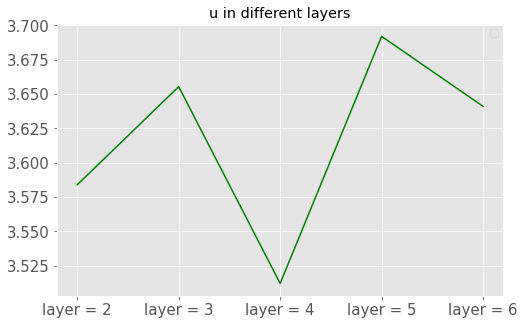

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


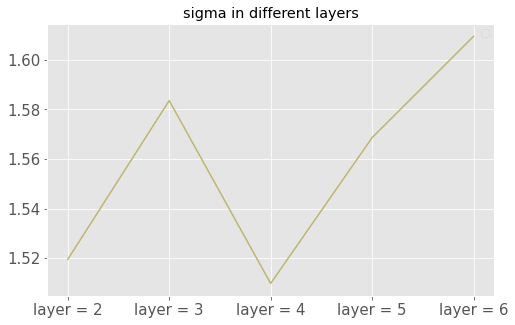

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


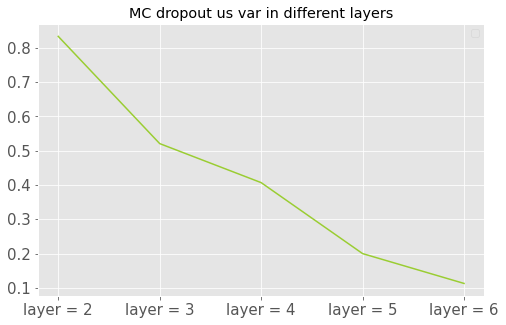

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


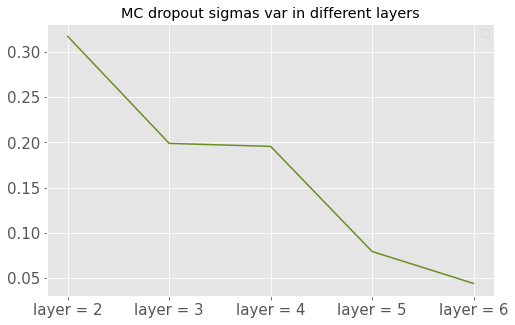

In [196]:
import pylab as plt
import numpy as np
import pandas as pd

yu = np.array([3.5839858,3.655388,3.512194,3.6919904,3.6410403,3.6829667])
ysigma = np.array([1.5195374,1.5835828,1.5098473,1.5686481,1.6094985,1.5705228])
uncertainu = np.array([0.83322346,0.5206403,0.40687707,0.19998968,0.11301253,0.12930305])
uncertainsigma = np.array([0.31756368,0.19889931,0.19558215,0.0790687,0.04363731,0.05416992])

x = ['layer = 2','layer = 3','layer = 4','layer = 5','layer = 6','layer = 7']

fig, ax = plt.subplots(figsize=(8, 5))
plt.style.use('ggplot')
ax.plot(x, yu, color = 'green')
ax.legend()
plt.title('u in different layers')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
plt.style.use('ggplot')
ax.plot(x, ysigma, color = 'darkkhaki')
ax.legend()
plt.title('sigma in different layers')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
plt.style.use('ggplot')
ax.plot(x, uncertainu, color = 'yellowgreen')
ax.legend()
plt.title('MC dropout us var in different layers')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
plt.style.use('ggplot')
ax.plot(x, uncertainsigma, color = 'olivedrab')
ax.legend()
plt.title('MC dropout sigmas var in different layers')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

0.01918394236167978
0.06449600038431652
0.1473933398751056
0.22896710361900416
0.24177894322376947
0.1735457623938224
0.08467587755776526
0.9600409694154631


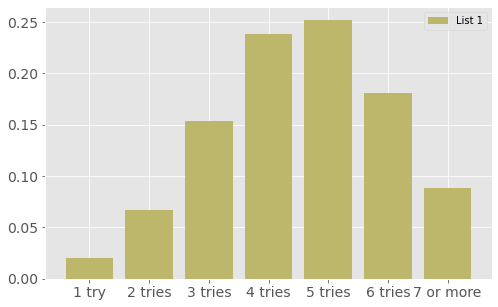

In [194]:
from scipy.stats import norm

normal_dist = norm(3.6410403, 1.6094985)
a = []
for i in range(0,7):
    pdf_value = normal_dist.pdf(i)
    print(pdf_value)
    a.append(pdf_value)

sum = np.sum(a)

print(sum)

a = a/sum
x = ['1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more']
fig, ax = plt.subplots(figsize=(8, 5))
plt.style.use('ggplot')
ax.bar(x, a, label='List 1',color = 'darkkhaki')
ax.legend()
# plt.title('word freq distribute')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()